In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers,models,Input,preprocessing
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

Loading datasets

In [ ]:
test_df = pd.read_csv('/content/test.csv')
train_df = pd.read_csv('/content/train.csv')
print(test_df.shape ,"\n", train_df.shape)

(23554, 784) 
 (23522, 785)


In [ ]:
df1 = train_df.copy()
df1

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23517,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23518,2,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23519,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23520,8,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y_df1 = df1.pop('label')

Preprocessing

In [ ]:
df1 = df1.values.reshape(-1,28,28,1)/255
y_df1 = y_df1.values

In [ ]:
df1.shape

(23522, 28, 28, 1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_test = train_test_split(df1, y_df1)

Model architecture

In [ ]:
model_arch = tf.keras.Sequential([
    layers.InputLayer(input_shape=[28,28,1]),
    layers.Conv2D(filters=16,kernel_size=3,activation='relu',padding='same'),
    layers.MaxPool2D(padding='same'),
    layers.Conv2D(filters=32,kernel_size=3,activation='relu',padding='same'),
    layers.MaxPool2D(padding='same'),
    layers.Conv2D(filters=32,kernel_size=3,activation='relu', padding='same'),
    layers.Conv2D(filters=32,kernel_size=3,activation='relu', padding='same'),
    layers.MaxPool2D(padding='same'),
    layers.Dropout(0.5),
    layers.Flatten(),
    layers.Dense(128,activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10,activation='softmax')
])

In [ ]:
model_arch.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 14, 14, 16)        0         
 g2D)                                                            
                                                                 
 conv2d_6 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 7, 7, 32)          0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 7, 32)          9248      
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 32)         

Training + results

In [ ]:
optimizer = tf.keras.optimizers.Adam()
model_arch.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

In [ ]:
history = model_arch.fit(X_train, y_train, epochs = 5, validation_data = (X_valid, y_test),)

Epoch 1/5
552/552 [==============================] - 20s 33ms/step - loss: nan - accuracy: 0.0959 - val_loss: nan - val_accuracy: 0.0985
Epoch 2/5
552/552 [==============================] - 18s 33ms/step - loss: nan - accuracy: 0.0959 - val_loss: nan - val_accuracy: 0.0985
Epoch 3/5
552/552 [==============================] - 18s 32ms/step - loss: nan - accuracy: 0.0959 - val_loss: nan - val_accuracy: 0.0985
Epoch 4/5
552/552 [==============================] - 18s 33ms/step - loss: nan - accuracy: 0.0959 - val_loss: nan - val_accuracy: 0.0985
Epoch 5/5
552/552 [==============================] - 18s 32ms/step - loss: nan - accuracy: 0.0959 - val_loss: nan - val_accuracy: 0.0985


Plots from results

<Axes: >

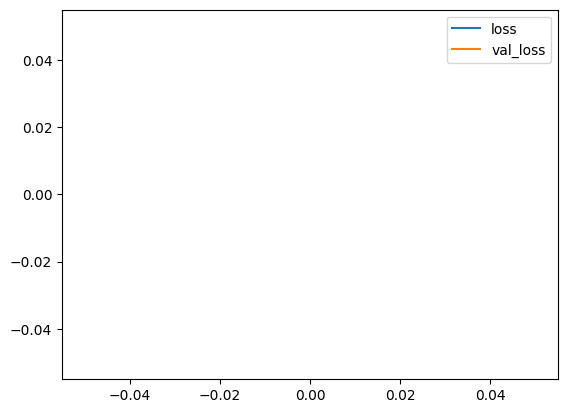

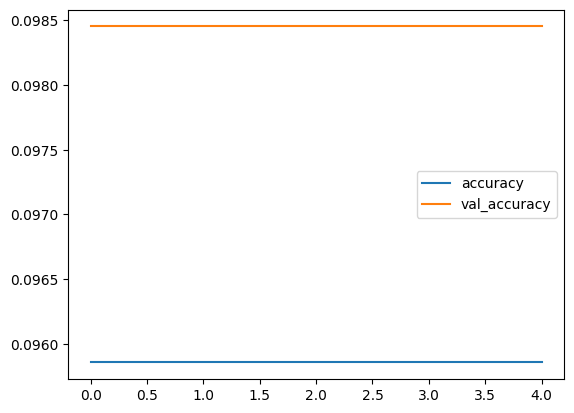

In [ ]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:,['loss', 'val_loss']].plot()
history_frame.loc[:,['accuracy','val_accuracy']].plot()

Test preprocessing + Model Prediction

In [ ]:
test1 = test_df.values.reshape(-1,28,28,1)/255

In [ ]:
preds = model_arch.predict(test1)

737/737 [==============================] - 10s 13ms/step


In [ ]:
predicted_labels = np.argmax(preds,axis=1)
predicted_labels.reshape(23554,1).shape

(23554, 1)

Submission


In [ ]:
ids = np.arange(1,23555)
ids.reshape(23554,1)

array([[    1],
       [    2],
       [    3],
       ...,
       [23552],
       [23553],
       [23554]])

In [ ]:
submission_df = pd.DataFrame({
    'ImageId':ids,
    'Label':predicted_labels
})

In [ ]:
submission_df.to_csv('/content/sample_submission.csv')